<h1>New restaurant in Charleston, SC</h1>
<p><h2>Table of contents</h2>
<ol>
<li><a href=#desc>Introduction</a></li>
<li><a href=#data>Data section</a></li>
<li>Methodology section </li>
<li>Results section</li>
<li>Discussion section</li>
<li>Conclusion section</li>
</ol>    
<h3><a id="desc"></a>Description of the problem and the background</h3>
<img src = "CharlestonSymbol.jpg" align="right", alt="Charleston city symbol", width="160">
<p>Charleston is the oldest and largest city in the U.S. state of South Carolina. It was founded in 1670 as Charles Town, honoring King Charles II of England. Known for its rich history, well-preserved architecture, distinguished restaurants, and hospitable people, Charleston is a popular tourist destination. It has received numerous accolades, including <a href = "https://www.travelandleisure.com/slideshows/americas-friendliest-cities#charleston">"America's Most Friendly City"</a> in 2016 by Travel & Leisure. The city is known for its unique culture, which blends traditional Southern U.S., English, French, and West African elements. The downtown peninsula has gained a reputation for its art, music, local cuisine, and fashion. What's also interesting, in 2013, the Milken Institute ranked the Charleston region as the ninth-best performing economy in the US because of its growing IT sector. 
<p>Not surprisingly, to find and to rent a place for a restaurant is not an easy task. An investor is my friend so I decided helping him in making the decison, by using Foursquare venues data and some Data Science magic. <b>Using the list of avaliable properties I have clustered them into different categories, based on the separate list of sorrounding venues</b>. In order to do that I had to do at least the following:
<ol>
<li>Get the geo-coordinates for given adresses</li>
<li>Get the list of venues with additional information</li>
<li>Visualise and explore the data</li>
<li>Preproces the datasets in order to use ML algorithm</li>
<li>Run unsupervised ML algorithm (K-means) to find clusters</li>
<li>Visualize results and make conclusions</li>
</ol> 

In [92]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import json # library to handle JSON files
import requests # library to handle requests
import folium # map rendering library
import matplotlib.pyplot as plt # Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans # import k-means from clustering stage
print("Libraries imported.")

Libraries imported.


<h3><a id=data></a>Description of the data and how it was used to solve the problem</h3>
<p>I have worked on two datasets: 
<ol>
    <li>list of potential addresses avaliable for rent,</li> 
    <li>list of nearby venues.</li></ol>
<p>Regarding the first list, since avaliable automatic methods does not work well or you have to pay for that kind of services I decided to get and enter geo-coordinates manually, using <A href="www.latlong.net">www.latlong.net</a>. Using MS Windows notepad prepare a dataset in .CSV file format and download it into the pandas dataframe. The <b>16 given locations</b> ware spreaded across Charleston area. The second dataset was created by downoading a list of <b>nearby venues within the 500 m radius</b>, through <a href="www.foursquare.com">Foursquare.com</a> API. It containes:* 
<ul>
<li>venue name,</li>
<li>venue latitude,</li>
<li>venue longitude,</li>
<li>venue category.
</ul>    
Both datasets ware finally merged and preprocesed in order to aplly K-means ML algorithm. On each stage of this assignment the data was visualized using Folium Python library or Matplotlib charts. 

<i><font size=1>* I wanted to get more data, like: price, rating, stats of the venues, however it was not possible with a free Forsquare subsription.</font></i> 

<h3>List of potential addresses avaliable for rent</h3>

In [93]:
df_addresses = pd.read_csv("CharlestonAddresses.csv")
print("Dataframe shape:", df_addresses.shape)
df_addresses

Dataframe shape: (16, 7)


,Address,City,State,Country,Latitude,Longtitude,Source
0,10 Murry Blvd,Charleston,South Carolina,USA,32.769940,-79.933240,https://www.latlong.net/
1,8 Queen St,Charleston,South Carolina,USA,32.778690,-79.927850,https://www.latlong.net/
2,12 Huger St,Charleston,South Carolina,USA,32.799390,-79.949980,https://www.latlong.net/
3,67 Line St,Charleston,South Carolina,USA,32.794708,-79.943268,https://www.latlong.net/
4,5 Columbus St,Charleston,South Carolina,USA,32.794330,-79.940710,https://www.latlong.net/
5,8 Mount Pleasant St,Charleston,South Carolina,USA,32.812400,-79.954900,https://www.latlong.net/
6,9 Davis St,Charleston,South Carolina,USA,32.840100,-79.956850,https://www.latlong.net/
7,2 Carr St,Charleston,South Carolina,USA,32.785220,-79.873420,https://www.latlong.net/
8,18 Ocean Boulevard,Charleston,South Carolina,USA,32.780800,-79.798240,https://www.latlong.net/
9,4 Middle Street,Charleston,South Carolina,USA,32.778740,-79.868810,https://www.latlong.net/


In [201]:
# creating map of Charleston using latitude and longitude values
charleston_map = folium.Map(location=[32.784618, -79.940918], zoom_start=12, control_scale=True, tiles="cartodbpositron") 

#visualising all the initial point on the Charleston map
for lat, lng, address, city in zip(df_addresses.Latitude, df_addresses.Longtitude, df_addresses.Address, df_addresses.City):
    label = '{}, {}'.format(address, city)
    folium.CircleMarker([lat, lng], popup=label, radius=5, color="red").add_to(charleston_map)

charleston_map

<ul><li>18 potential addresses fur new business endavour.  
<li>6 are very close to the ocean, probably because of the views and the fact, that during the season, usually "by the see" areas are more popular.</li>
<li>8 are located directly in a popular turism distric of the Charleston penisula. Usually the most crowded area. </li>
<li>There is clear that part of locations ar concentrated on the penisula directy while the others (7) are spreaded far from the typical tourists penisula area</li></ul>

<h3>List of nearby venues</h3>
<p>Passing credentials to Foursqare API.

In [206]:
CLIENT_ID = "*******************" # my Foursquare ID
CLIENT_SECRET = "***************" # my Foursquare Secret
VERSION = '20181122' # Foursquare API version
LIMIT = 100 #Just in case 

print('My credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

My credentails:
CLIENT_ID: *******************
CLIENT_SECRET:***************


Preparing the API query function. 

In [99]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for adress, lat, lng in zip(df_addresses.Address, df_addresses.Latitude, df_addresses.Longtitude):
        print(adress)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(adress, lat, lng, 
            v['venue']['name'],               
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    df_nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    df_nearby_venues.columns = ['Address', 
                  'Latitude', 
                  'Longitude', 
                  'Venue Name',
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(df_nearby_venues)

Executing the function and geting the data into the pandas dataframe.

In [100]:

df_charleston_venues = getNearbyVenues(names=df_addresses.Address, latitudes=df_addresses.Latitude, 
                                        longitudes=df_addresses.Longtitude) 

10 Murry Blvd
8 Queen St
12 Huger St
67 Line St
5 Columbus St
8 Mount Pleasant St
9 Davis St
2 Carr St
18 Ocean Boulevard
4 Middle Street
77 Fort Johnson Road
5 Dills Bluf Road
96 East Bay Street
58 Gordon Street
49 Houston Northcutt Boulevard
8 Smythe Street


The venues dataset exploration.

In [101]:
print("Dataframe shape:", df_charleston_venues.shape)
df_charleston_venues.head()

Dataframe shape: (339, 7)


,Address,Latitude,Longitude,Venue Name,Venue Latitude,Venue Longitude,Venue Category
0,10 Murry Blvd,32.76994,-79.93324,The Battery,32.770012,-79.929460,Scenic Lookout
1,10 Murry Blvd,32.76994,-79.93324,White Point Gardens,32.769963,-79.930176,Park
2,10 Murry Blvd,32.76994,-79.93324,The Gazebo At The Battery,32.769864,-79.930220,Historic Site
3,10 Murry Blvd,32.76994,-79.93324,Calhoun Mansion,32.771461,-79.930224,Historic Site
4,10 Murry Blvd,32.76994,-79.93324,Two Meeting Street,32.770500,-79.930099,Bed & Breakfast


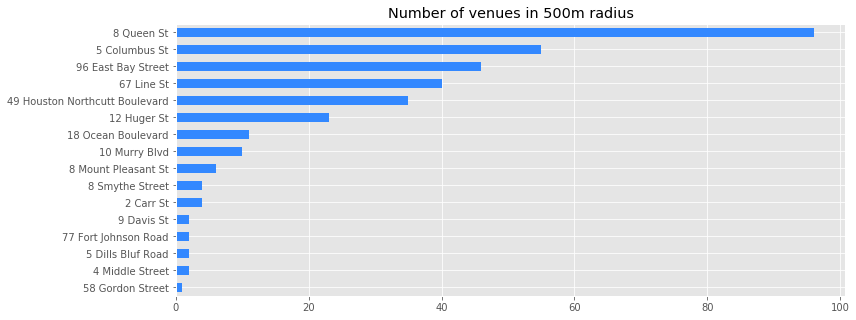

In [145]:
df_charleston_venues.groupby('Address')["Venue Name"].count().sort_values(ascending=True).plot(kind="barh", figsize=(12,5), color="#3388ff")
plt.style.use('ggplot')
plt.title("Number of venues in 500m radius")
plt.ylabel("")
plt.show()

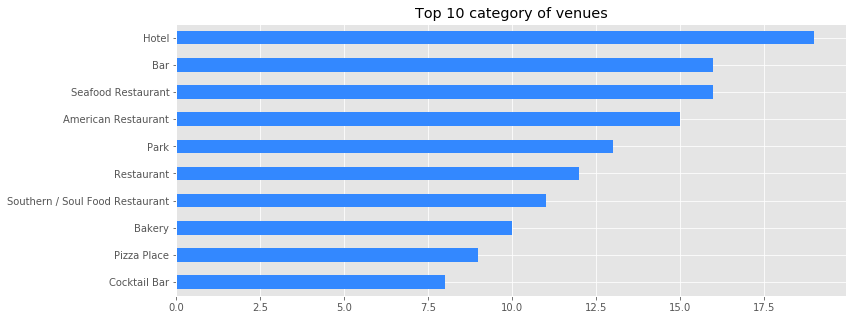

In [102]:
pd.value_counts(df_charleston_venues["Venue Category"])[0:10].sort_values(ascending=True).plot(kind="barh", figsize=(12,5), color="#3388ff")
plt.style.use('ggplot')
plt.title("Top 10 category of venues")
plt.ylabel("")
plt.show()

The most popular venues nearby are restaurants, hotels and bars. Information about the most popular types of restaurants can be used as an indication of which cuisine to serve and where to localize the restaurant to differentiate and at the same time, to be in a convenient location, full of potential customers. Let's dig a bit deeper...

In [133]:
dfg = pd.DataFrame(df_charleston_venues.groupby(["Address", "Venue Category"])["Venue Category"].count()) 
dfg.rename(columns={"Venue Category":"Count"}, inplace=True)
dfg[dfg["Count"] > 3] #by changing the count number you can filter this temporary dataframe

Count
Address            Venue Category                        
10 Murry Blvd      Bed & Breakfast                      4
18 Ocean Boulevard Beach                                4
5 Columbus St      Bar                                  5
                   Hotel                                4
67 Line St         Bar                                  4
8 Queen St         Bar                                  4
                   Breakfast Spot                       4
                   Hotel                                6
                   Seafood Restaurant                   8
                   Southern / Soul Food Restaurant      8
                   Steakhouse                           4

The above data could be usefull in restaurant location decision. In example it clearly show that 8 Queen St is the most diversified and lively area from the list. More hotels means also more clients right behind the corner. <b>However, we want to now how many and what kind of competition we would have. So let's dig a bit more to find out more, particulary about restaurants...</b>

In [144]:
dfgr = pd.DataFrame(df_charleston_venues[df_charleston_venues["Venue Category"].str.contains("Restaurant")].groupby(["Address", "Venue Category"])["Venue Category"].count()) 
dfgr.rename(columns={"Venue Category":"Count"}, inplace=True)
print("...et voilà!")
dfgr[dfgr["Count"] > 1] #by changing the count number you can filter this temporary dataframe, now is: more than 1 restaurant

...et voilà!


Count
Address                        Venue Category                        
12 Huger St                    Restaurant                           2
18 Ocean Boulevard             American Restaurant                  2
49 Houston Northcutt Boulevard Fast Food Restaurant                 2
5 Columbus St                  American Restaurant                  2
                               French Restaurant                    2
                               Restaurant                           2
                               Seafood Restaurant                   3
                               Tapas Restaurant                     2
67 Line St                     American Restaurant                  2
                               French Restaurant                    2
                               Italian Restaurant                   2
                               Restaurant                           2
                               Seafood Restaurant                   2
                               Tapas Restaurant                     2
8 Queen St                     American Restaurant                  3
                               New American Restaurant              3
                               Restaurant                           3
                               Seafood Restaurant                   8
                               Southern / Soul Food Restaurant      8
96 East Bay Street             American Restaurant                  2
                               Seafood Restaurant                   2
                               Southern / Soul Food Restaurant      2

For the formalities I added a map with the visualization of all potential new restaurant addresses and all the venues.

In [202]:
# creating map of Charleston using latitude and longitude values
charleston_map = folium.Map(location=[32.784618, -79.940918], zoom_start=12, control_scale=True, tiles="cartodbpositron") 

#visualising all the venues on the Charleston map
for lat, lng, venuename, category in zip(df_charleston_venues["Venue Latitude"], 
                                         df_charleston_venues["Venue Longitude"], 
                                         df_charleston_venues["Venue Name"],
                                         df_charleston_venues["Venue Category"]):
    label = '{}, {}'.format(address, city)
    folium.CircleMarker([lat, lng], popup=label, radius=5, opacity=0.4).add_to(charleston_map)

#visualising all the initial addresses on the Charleston map
for lat, lng, address, city in zip(df_addresses.Latitude, df_addresses.Longtitude, df_addresses.Address, df_addresses.City):
    label = '{}, {}'.format(address, city)
    folium.CircleMarker([lat, lng], popup=label, radius=5, color="red").add_to(charleston_map)

charleston_map